In [183]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Forecasting Sales/Walmart.csv')

In [185]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


**store -** store id

**Date -**Sale date

**weekly_sales -** weekly sale for the store

**Holiday_flag -** 1-Holiday, 0-Not holiday

**Temperature -** recorded temperature on the day of sale

**Fuel_Price -** Fuel price on the day of sale

**CPI -** Consumer Price Index

**Unemployemnt -** Unemployement Rate

In [186]:
data.shape

(6435, 8)

There are **6435** records with **8** columns

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Date column does not have the correct datatype, it need to be corrected

In [188]:
data['Date']=pd.to_datetime(data['Date'])

<ipython-input-188-54a1eaf80efb>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date']=pd.to_datetime(data['Date'])


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


**Data Cleaning**

In [190]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

There are no Null values in the dataset

In [191]:
data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

**EDA-** Exploratory Data Analysis

In [192]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [193]:
day={0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
month={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
data['day']=data['Date'].dt.weekday.map(day)
data['month']=data['Date'].dt.month.map(month)
data['year']=data['Date'].dt.year
data['week']=data['Date'].dt.week

<ipython-input-193-c4d60e238193>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['week']=data['Date'].dt.week


Extracted the weekday, month, year and week from the Date column

In [194]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,18


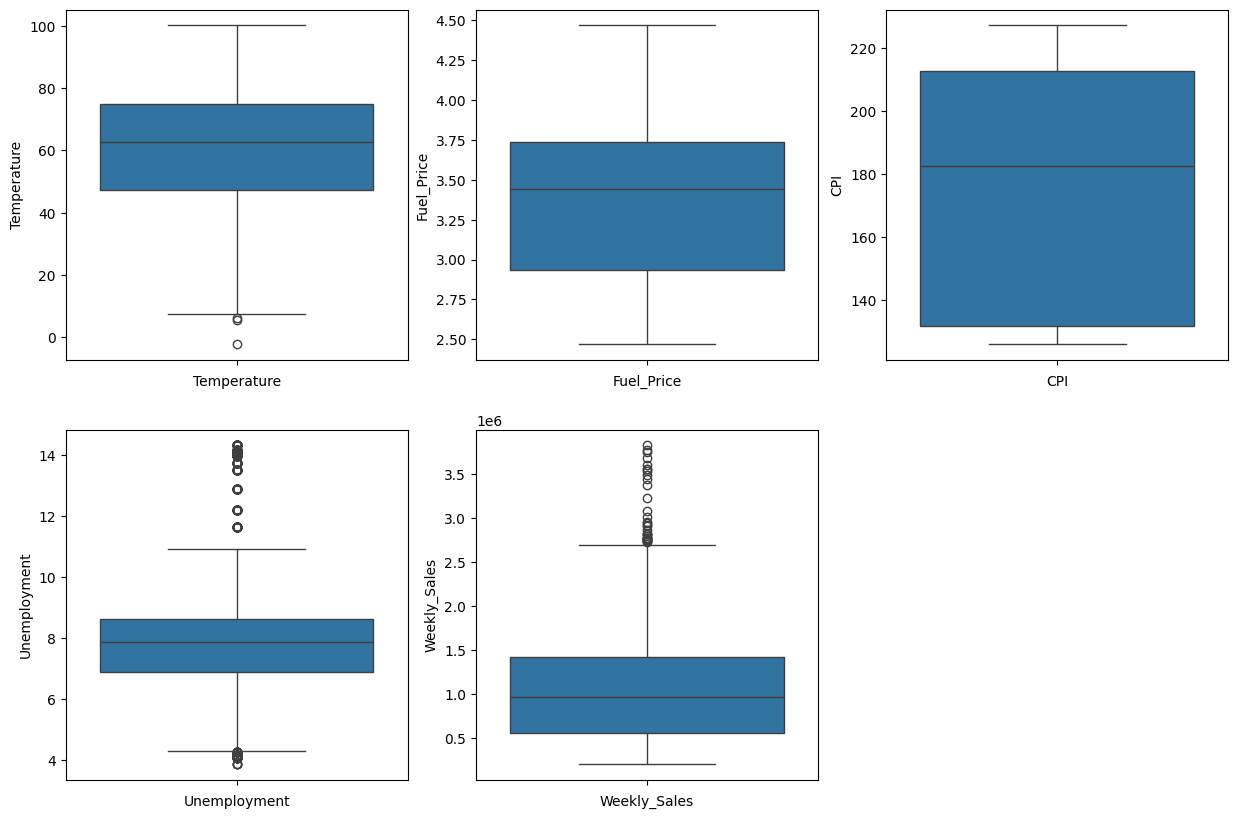

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
pos=1
plt.figure(figsize=(15,10))
columns=['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']
for i in columns:
  plt.subplot(2,3,pos)
  sns.boxplot(y=i,data=data)
  plt.xlabel(i)
  pos+=1
plt.show()

There are outliers in Temperature, Unemployment, weekly_sales columns

In [196]:
#Removing outliers
import numpy as np
def remove_outlier():
  cols=['Temperature','Unemployment','Weekly_Sales']
  for i in cols:
    x=np.quantile(data[i],[0.25,0.75])
    iqr=x[1]-x[0]
    upper_whisker=x[1]+(iqr*1.5)
    lower_whisker=x[0]-(iqr*1.5)
    data[i]=np.where(data[i]>upper_whisker,upper_whisker,np.where(data[i]<lower_whisker,lower_whisker,data[i]))
remove_outlier()

Checking if oultier are removed or not

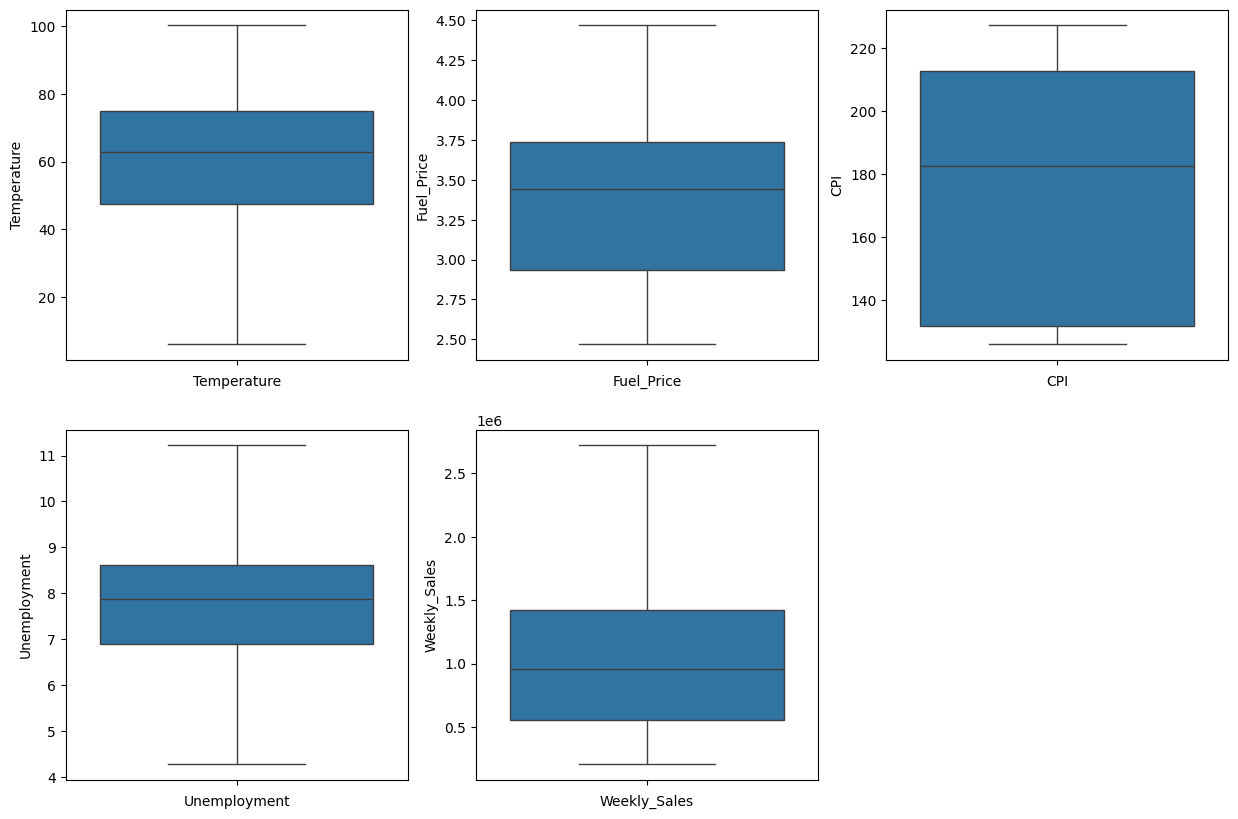

In [197]:
pos=1
plt.figure(figsize=(15,10))
columns=['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']
for i in columns:
  plt.subplot(2,3,pos)
  sns.boxplot(y=i,data=data)
  plt.xlabel(i)
  pos+=1
plt.show()

Outliers are removed

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   day           6435 non-null   object        
 9   month         6435 non-null   object        
 10  year          6435 non-null   int64         
 11  week          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 603.4+ KB


**1. Did more sale occur during holiday weeks compared to non-holiday weeks?**

Text(0.5, 0, 'Week Type')

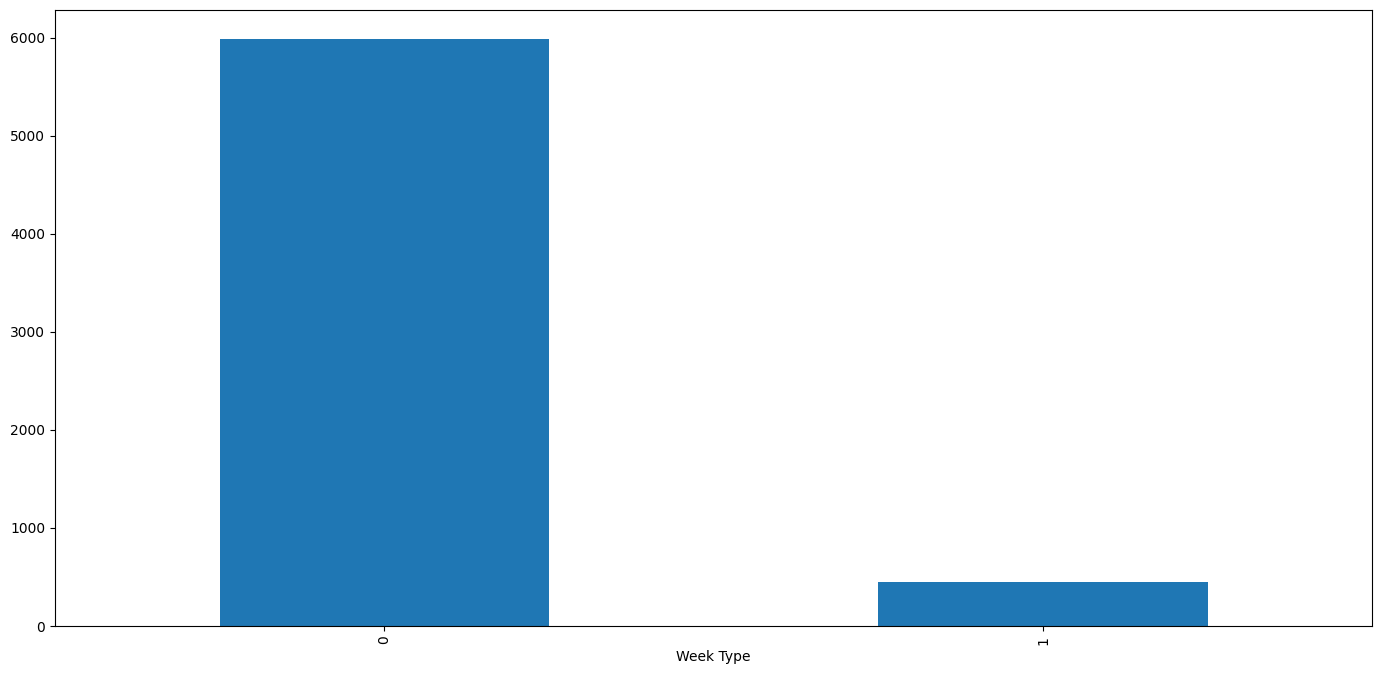

In [199]:
x=data['Holiday_Flag'].value_counts()
Holiday_week_avg_sale=np.sum(data[data['Holiday_Flag']==1]['Weekly_Sales'])/x[1]
Non_Holiday_week_avg_sale=np.sum(data[data['Holiday_Flag']==0]['Weekly_Sales'])/x[0]
x.plot(kind='bar')
plt.xlabel('Week Type')

([<matplotlib.patches.Wedge at 0x7dcb4e005690>,
 [Text(-1.073561123911563, 0.23972174124543214, 'Non Holiday week'),
  Text(1.171157583600513, -0.2615146542261208, 'Holiday week')],
 [Text(-0.5855787948608525, 0.13075731340659932, '93.01%'),
  Text(0.6831752571002991, -0.1525502149652371, '6.99%')])

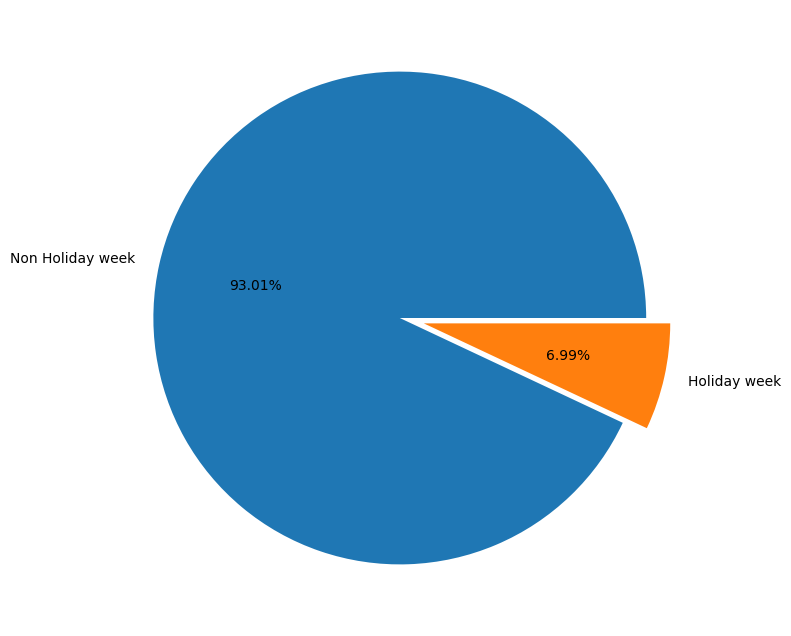

In [200]:
plt.pie(x,labels=['Non Holiday week','Holiday week'],autopct='%1.2f%%',explode=[0,0.1])

It is observed that the sale on Non-Holiday week is more compared to Holiday week. 93% of sales happen during the non holiday week

**2.In which year the sale was high?**

<Axes: xlabel='year'>

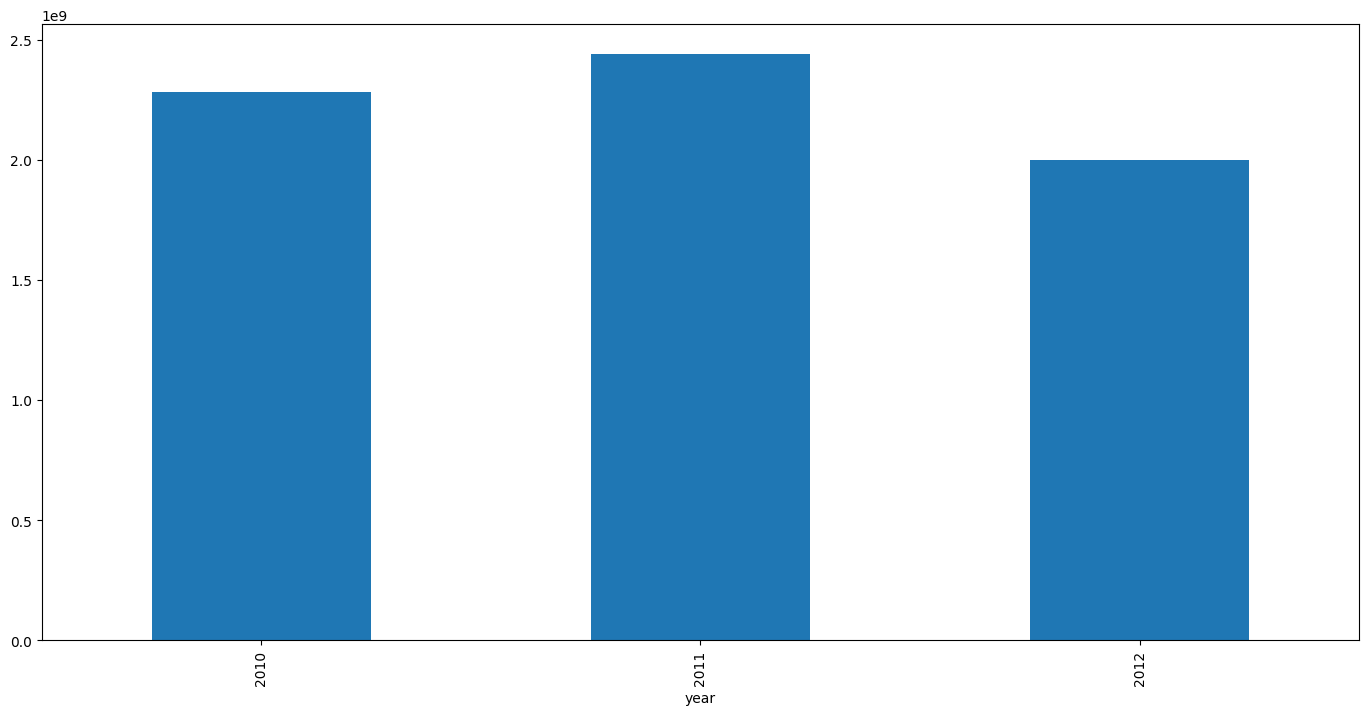

In [201]:
year_sales=data.groupby('year')['Weekly_Sales'].sum()
year_sales.plot(kind='bar')

([<matplotlib.patches.Wedge at 0x7dcb4d619510>,
 [Text(0.5319298191798044, 0.9628347041249296, '2010'),
  Text(-1.0904788400713177, -0.1444157171387992, '2011'),
  Text(0.6537334251018541, -0.884665252456882, '2012')],
 [Text(0.29014353773443874, 0.5251825658863252, '33.93%'),
  Text(-0.5948066400389005, -0.07877220934843591, '36.32%'),
  Text(0.35658186823737487, -0.48254468315829924, '29.74%')])

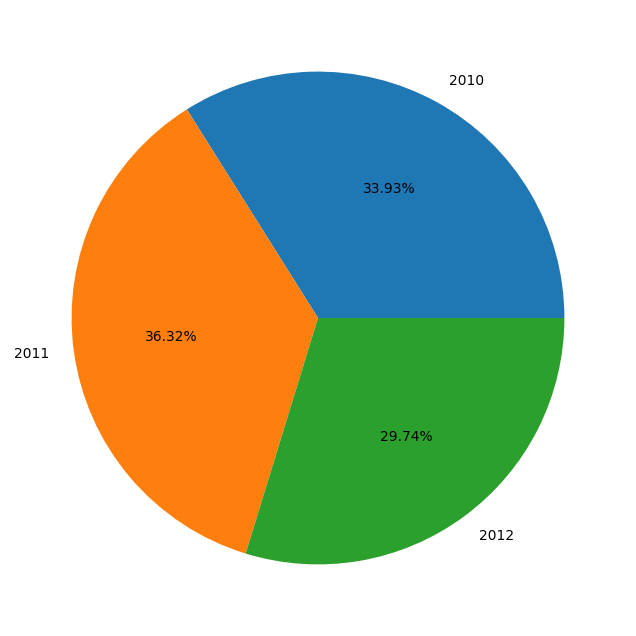

In [202]:
plt.pie(year_sales,labels=data['year'].unique(),normalize=True,autopct='%1.2f%%')

Year 2011 has highest amount of Sale

**3.Which month has highest sales overall?**

<Axes: xlabel='month'>

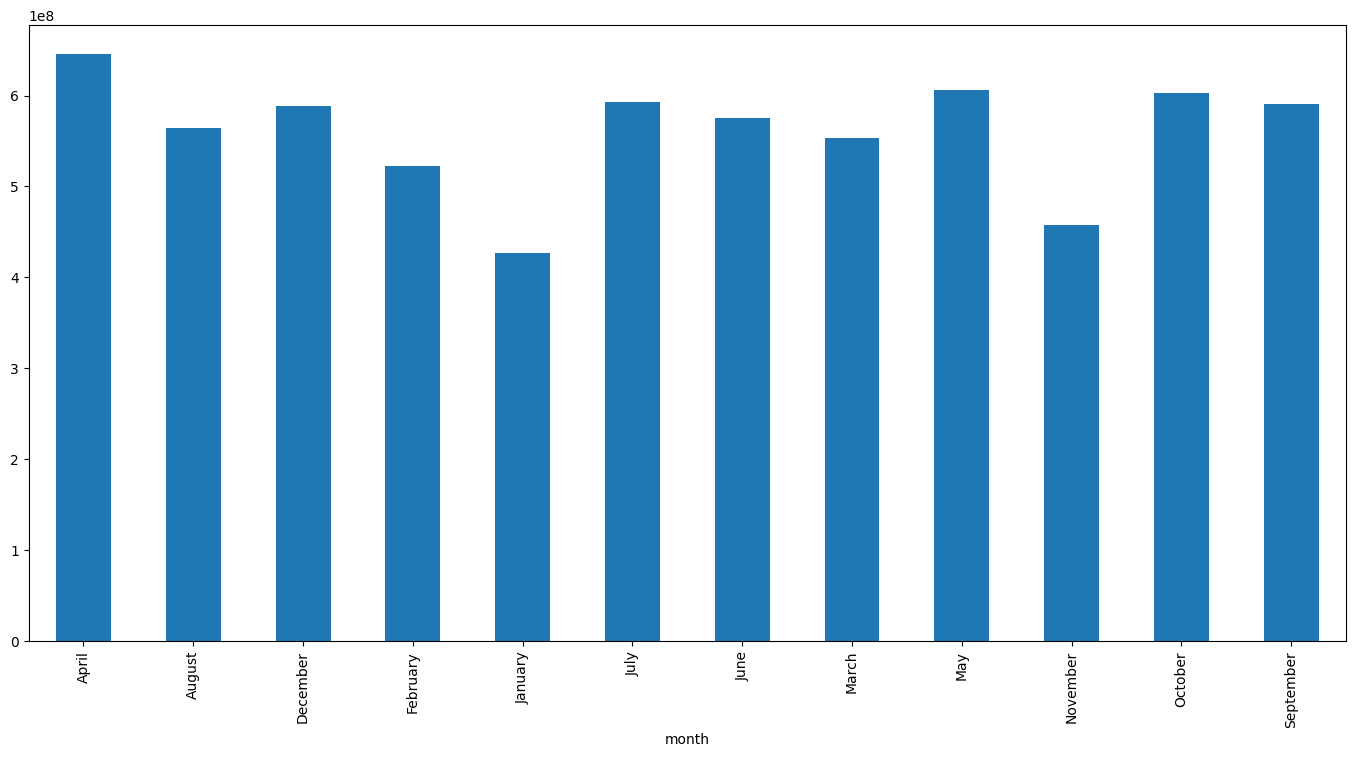

In [203]:
data.groupby('month')['Weekly_Sales'].sum().plot(kind='bar')

April month has highest amount of sales

**4.Which month in 2011 has highest weekly_sales?**

<Axes: xlabel='month'>

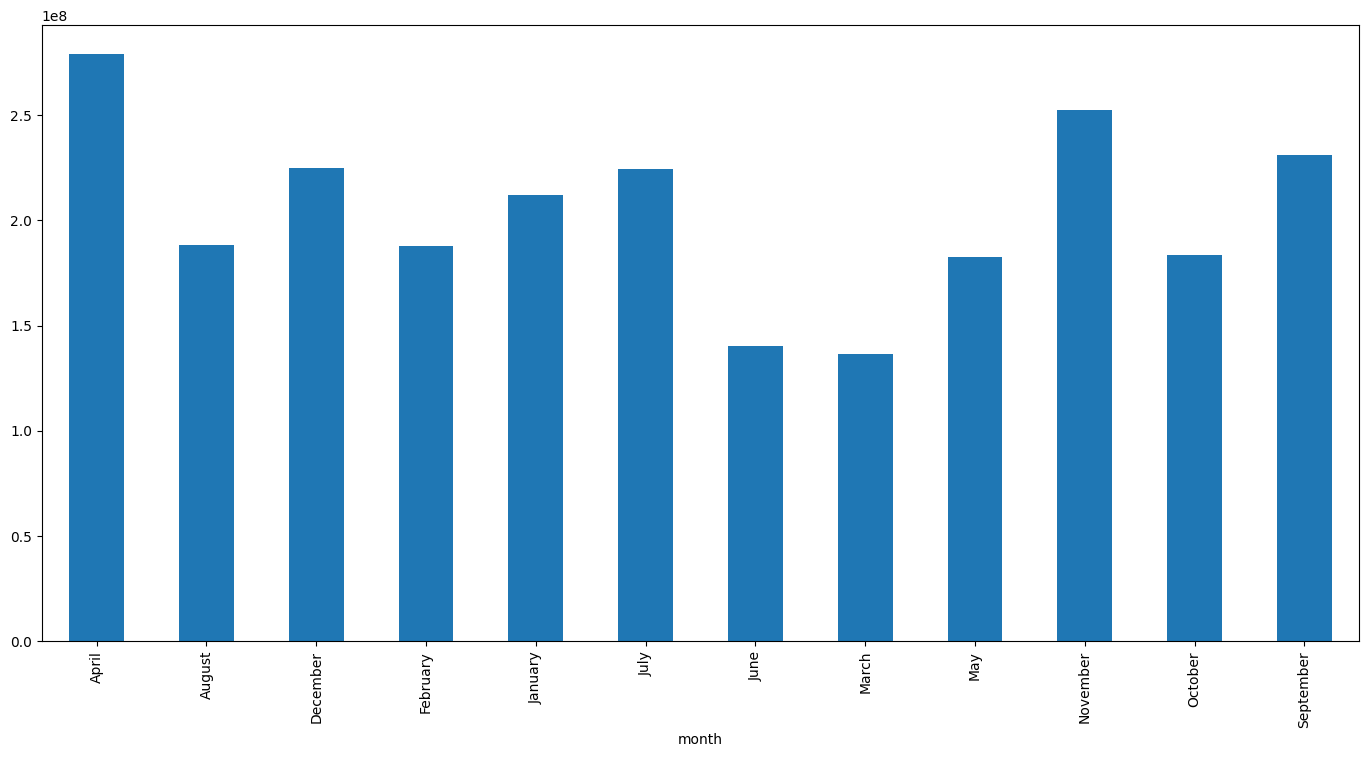

In [204]:
month_sales=data[data['year']==2011].groupby('month')['Weekly_Sales'].sum()
month_sales.plot(kind='bar')

([<matplotlib.patches.Wedge at 0x7dcb4d67a050>,
 [Text(1.029953490825653, 0.386258730303992, 'May'),
  Text(0.6313368854967257, 0.9007850670450163, 'December'),
  Text(0.08839934926696746, 1.0964422260425657, 'February'),
  Text(-0.4782698501497027, 0.9905846508187884, 'March'),
  Text(-0.903447737868221, 0.6275206649511985, 'September'),
  Text(-1.098847652960265, 0.050337218672837934, 'April'),
  Text(-1.002948759961657, -0.451767401315516, 'July'),
  Text(-0.7826918961088675, -0.7729122820640812, 'November'),
  Text(-0.40902616803303554, -1.0211256503801143, 'June'),
  Text(0.1958806196588489, -1.0824189497796433, 'August'),
  Text(0.7419026365922167, -0.8121456013656156, 'October'),
  Text(1.0517956255843253, -0.32206515179646183, 'January')],
 [Text(0.5617928131776287, 0.2106865801658138, '11.42%'),
  Text(0.3443655739073049, 0.49133730929728153, '7.70%'),
  Text(0.04821782687289134, 0.5980593960232176, '9.20%'),
  Text(-0.2608744637180196, 0.5403189004466118, '7.68%'),
  Text(-0.

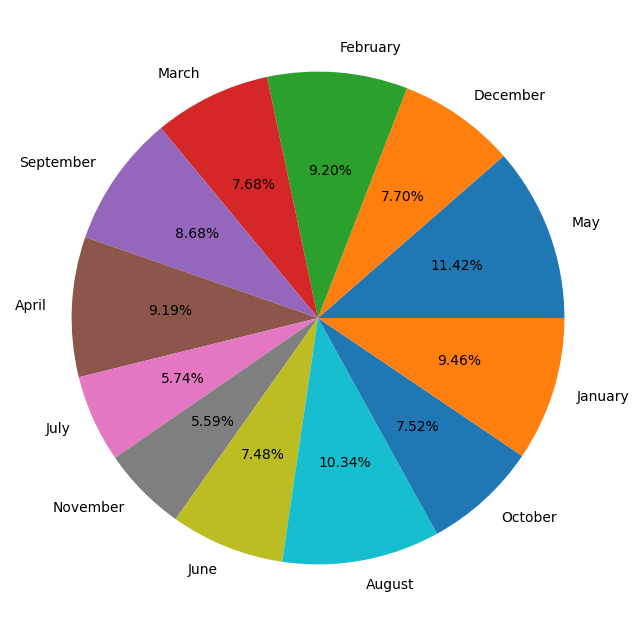

In [205]:
plt.pie(month_sales,labels=data['month'].unique(),normalize=True,autopct='%1.2f%%')

April month in 2011 has highest weekly sales, this month also recorded as highest weekly_sales over all the years.

**5.which store has highest number of Sales?**

In [206]:
data.groupby('Store')['Weekly_Sales'].sum()

Store
1     2.224028e+08
2     2.741628e+08
3     5.758674e+07
4     2.973575e+08
5     4.547569e+07
6     2.237489e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.692807e+08
11    1.939628e+08
12    1.442872e+08
13    2.845247e+08
14    2.870091e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    2.990663e+08
21    1.081179e+08
22    1.470756e+08
23    1.987367e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.534795e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Store'>

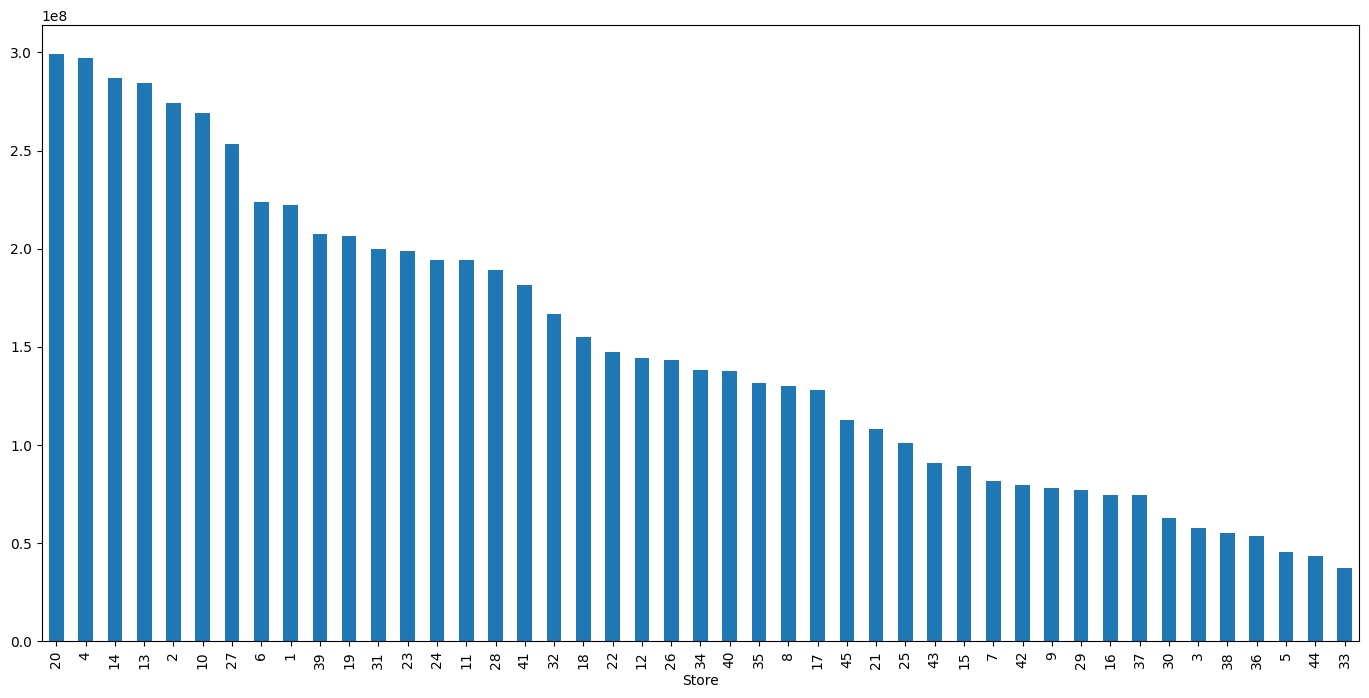

In [207]:
data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar')

Store 20 has highest sales of 299 million USD and store 4 sales is also closer to store 20 sales with 297 million USD. Store 33 recorded the lowest sales among all the stores.

**6.Does store 20 has highest weekly sales in 2011?**

In [208]:
data[data['year']==2011].groupby('Store')['Weekly_Sales'].sum()

Store
1     8.092192e+07
2     9.810388e+07
3     2.081688e+07
4     1.098009e+08
5     1.647082e+07
6     8.052876e+07
7     3.066264e+07
8     4.751279e+07
9     2.868597e+07
10    9.791945e+07
11    7.052358e+07
12    5.258200e+07
13    1.035173e+08
14    1.054476e+08
15    3.228262e+07
16    2.742137e+07
17    4.639184e+07
18    5.421774e+07
19    7.484190e+07
20    1.087737e+08
21    4.023488e+07
22    5.355471e+07
23    7.227353e+07
24    6.993898e+07
25    3.643441e+07
26    5.204925e+07
27    9.190404e+07
28    6.915601e+07
29    2.795035e+07
30    2.218215e+07
31    7.416923e+07
32    6.134719e+07
33    1.295784e+07
34    5.036018e+07
35    4.408698e+07
36    1.897262e+07
37    2.708150e+07
38    1.994076e+07
39    7.577760e+07
40    5.034054e+07
41    6.671587e+07
42    2.911730e+07
43    3.205320e+07
44    1.549819e+07
45    4.113537e+07
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Store'>

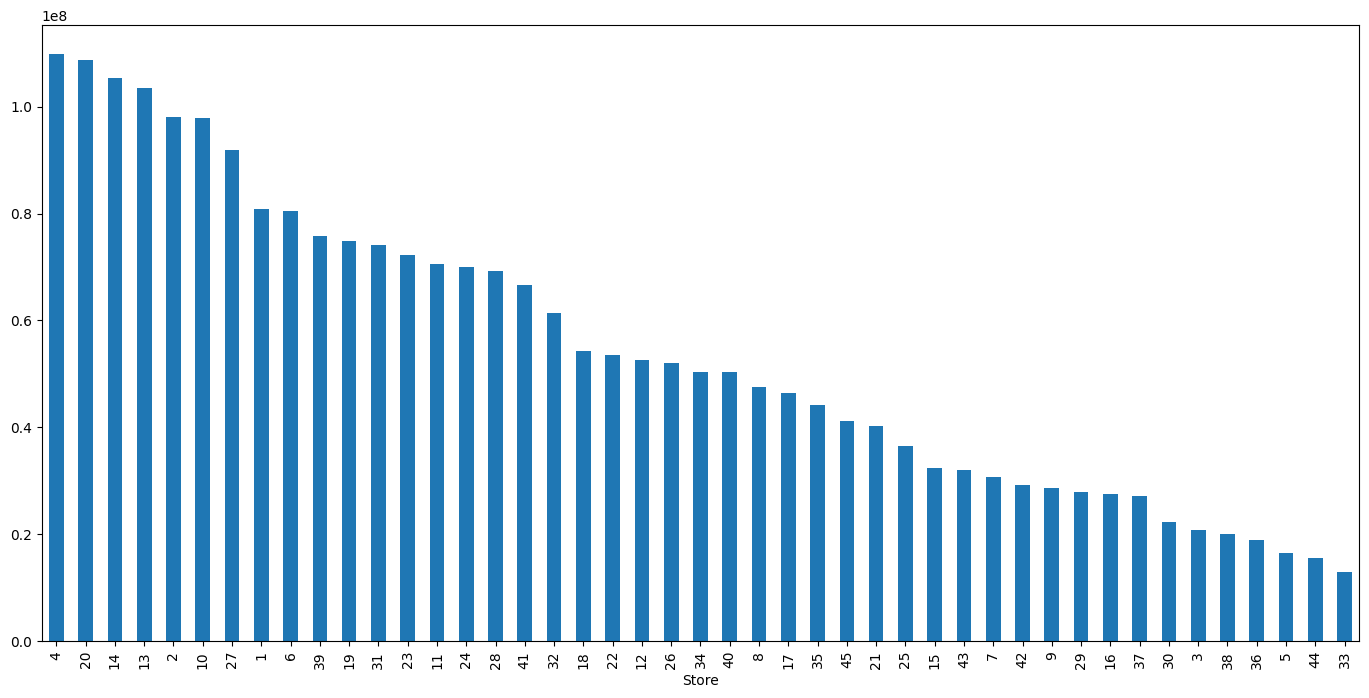

In [209]:
data[data['year']==2011].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar')

Yes! store 20 has highest amount of sales in the year 2011 but store 4 also did almost the same amount of sales in 2011. Over all the year store 20 was highest

**7.What was the day with the highest sales for Walmart across all the years?**

<Axes: xlabel='day'>

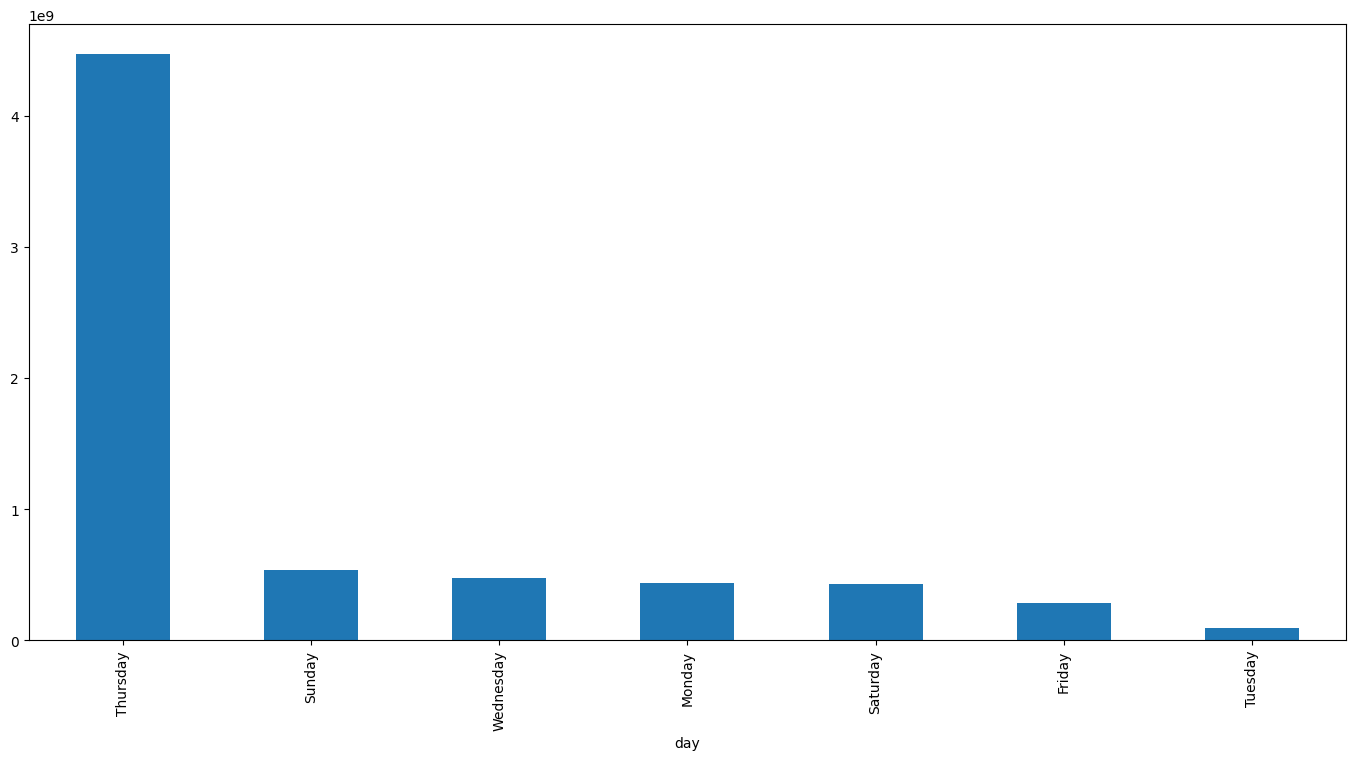

In [210]:
data.groupby('day')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar')

Thursday sales are very much higher when compared to other days of the week

**8.What is the Trend of yearly sales**

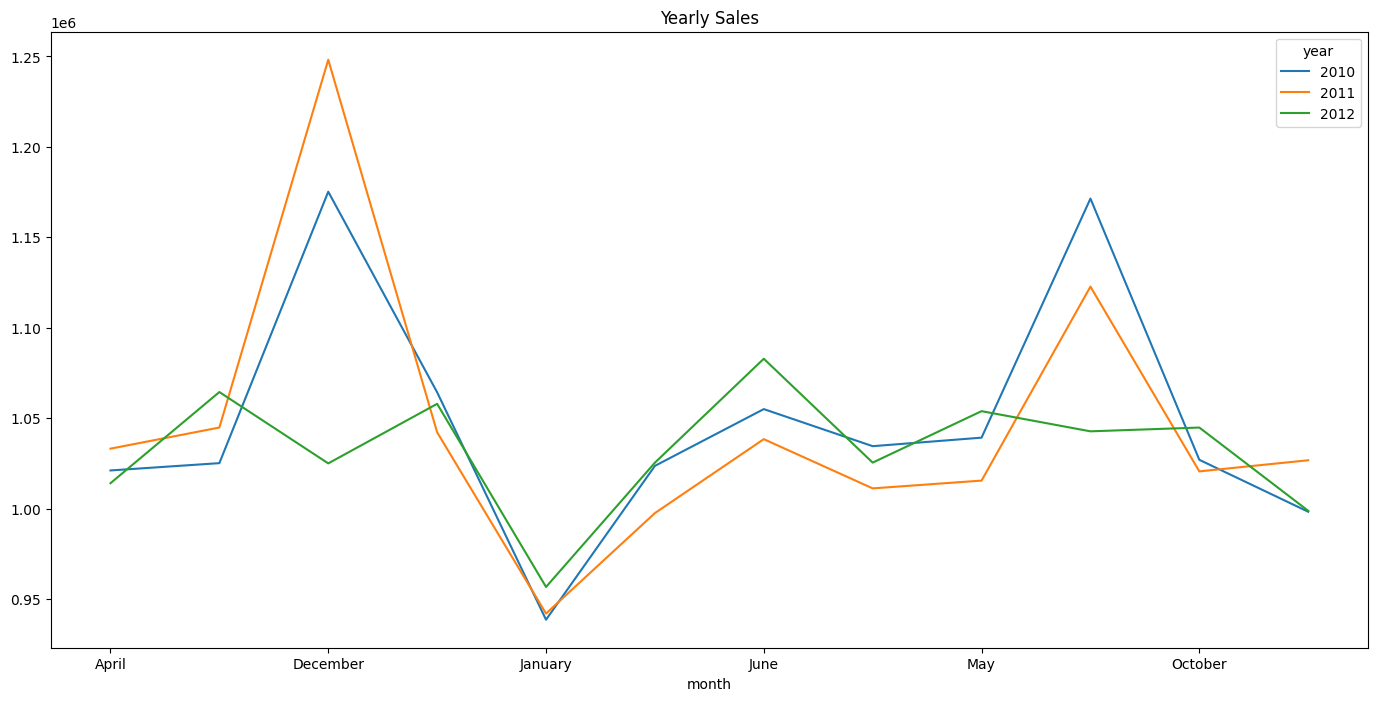

In [211]:
monthly_sales=pd.pivot_table(data,index='month',columns='year',values='Weekly_Sales')
monthly_sales.plot()
plt.title('Yearly Sales')
plt.show()

It is evident that the sales drop drastically during January and sales peak in the month of December

**9.Which store has highest and least sales during Thursday?**

<Axes: xlabel='Store'>

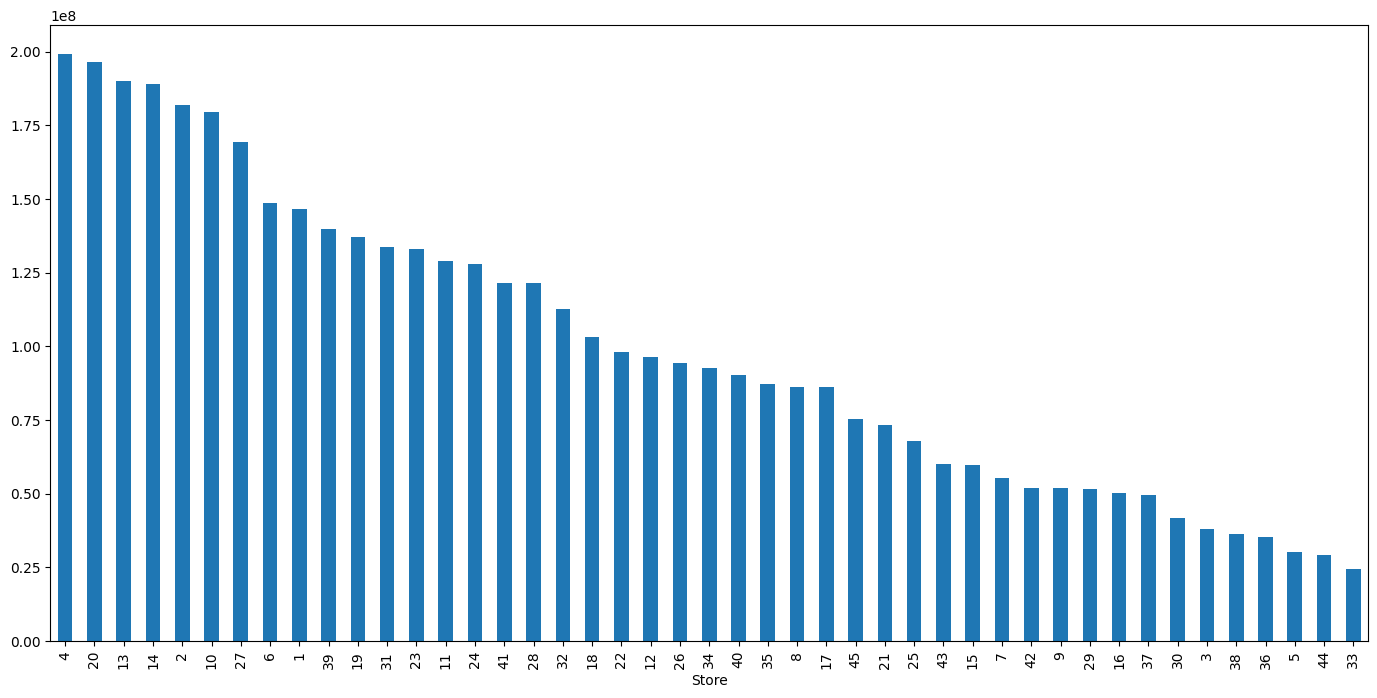

In [212]:
data[data['day']=="Thursday"].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar')

On Thursday, Store 4 and then Store 20 recorded the highest sales among all stores, with $199 million and $196 million respectively. Conversely, Store 33 registered the lowest sales on Thursday, amounting to $24.5 million.

**10. Which store excelled and which store performed the least during the peak sales month of December?**

<Axes: xlabel='Store'>

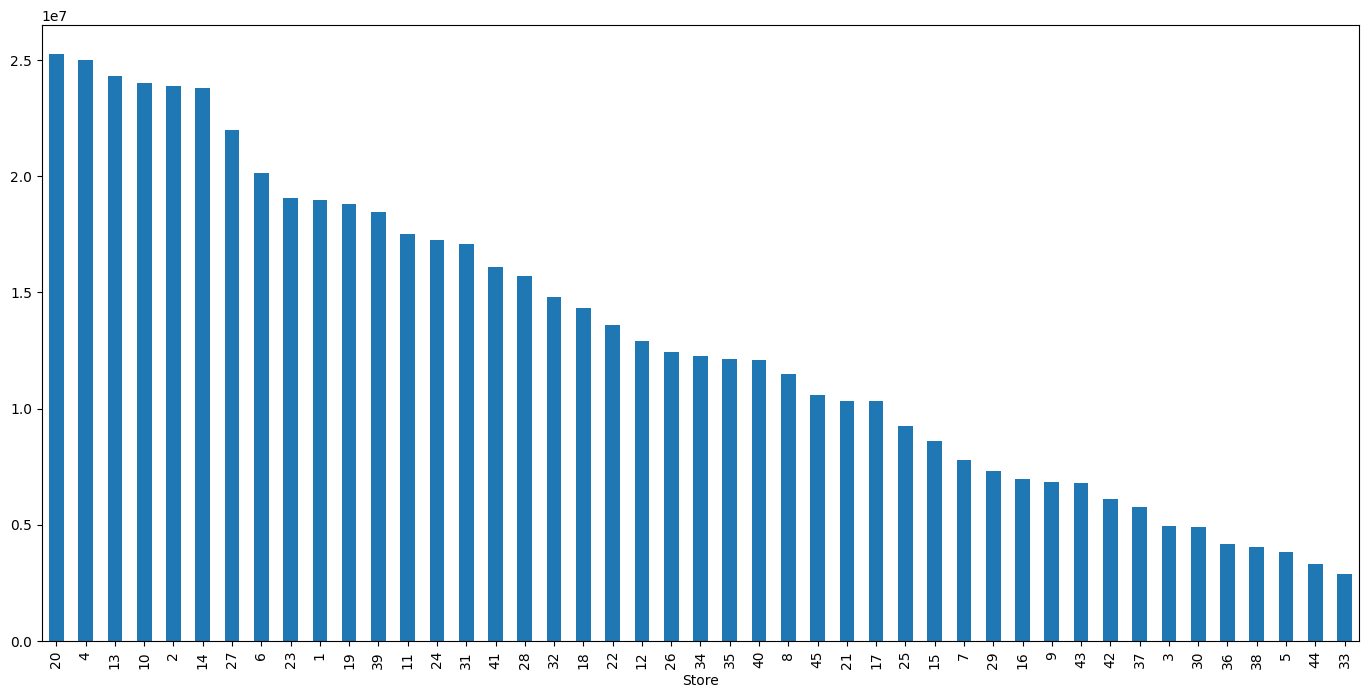

In [213]:
data[data['month']=='December'].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar')

Store 20 and 4 did very well and store 33 did the least sales

**11.Trend of Numeric Features**

<ipython-input-214-89bb7613949b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Date',y=i,hue=data['Holiday_Flag'],data=data,ci=False)
<ipython-input-214-89bb7613949b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Date',y=i,hue=data['Holiday_Flag'],data=data,ci=False)
<ipython-input-214-89bb7613949b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Date',y=i,hue=data['Holiday_Flag'],data=data,ci=False)
<ipython-input-214-89bb7613949b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Date',y=i,hue=data['Holiday_Flag'],data=data,ci=False)
<ipython-input-214-89bb7613949b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='

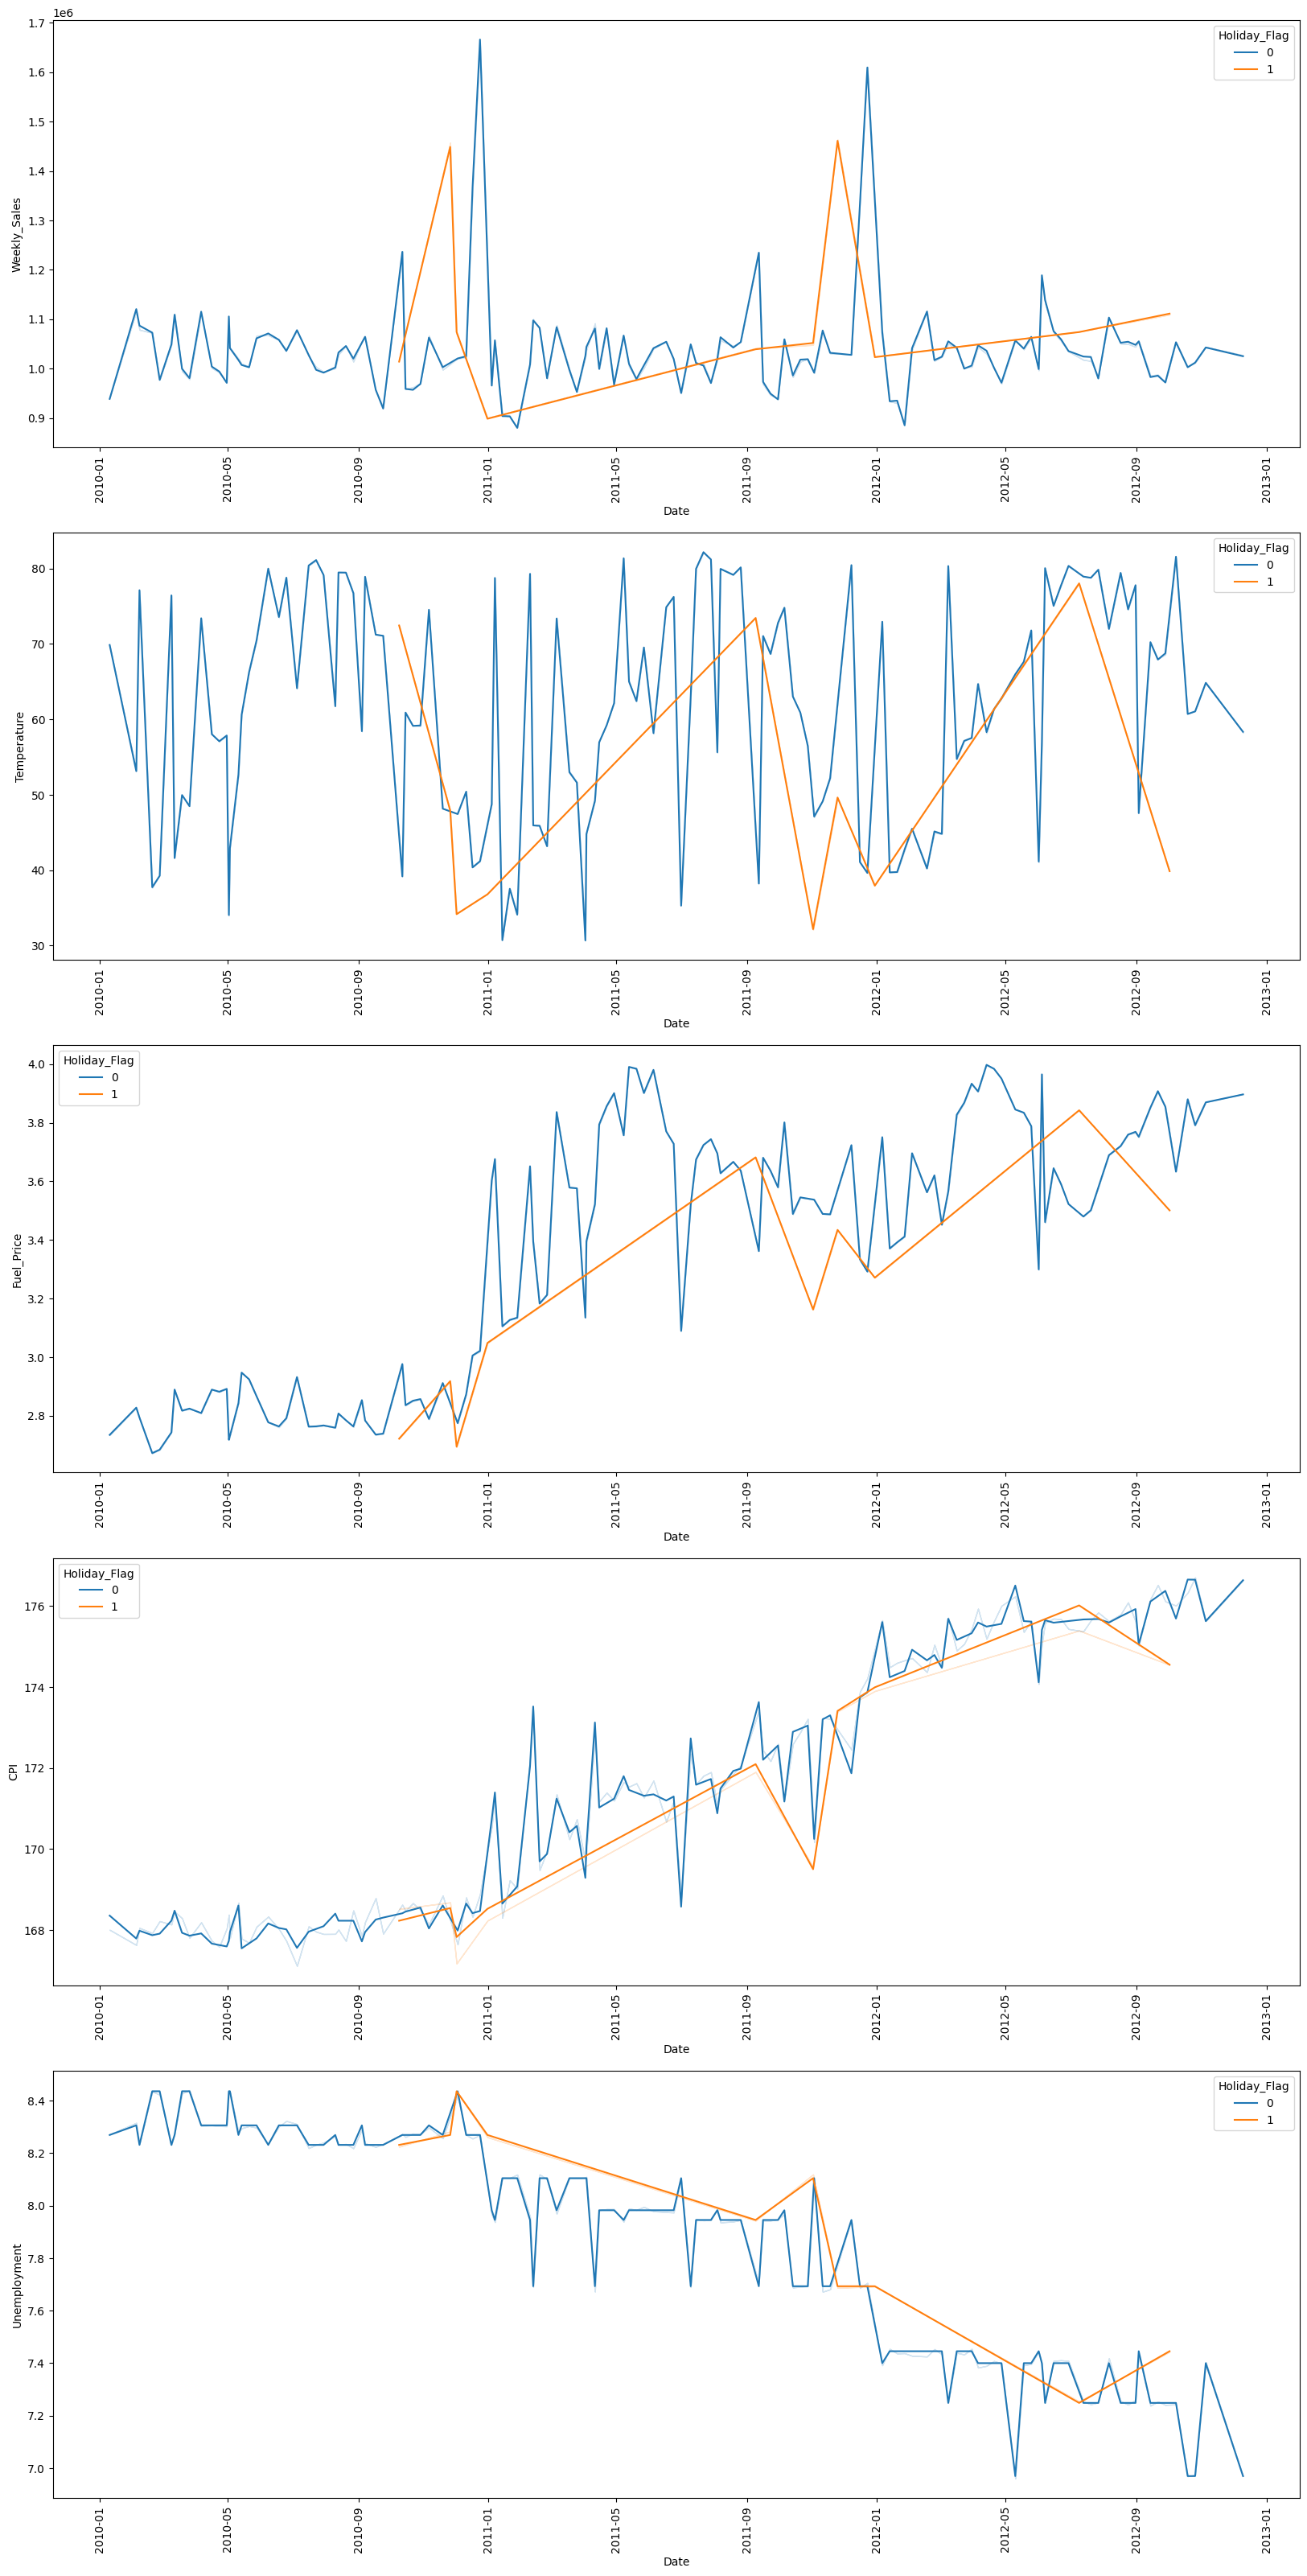

In [214]:
pos=1
plt.figure(figsize=(20,40))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
  plt.subplot(5,1,pos)
  sns.lineplot(x='Date',y=i,hue=data['Holiday_Flag'],data=data,ci=False)
  plt.xticks(rotation=90)
  pos+=1


**Observations:**

There has been an upward trend in both the Consumer Price Index (CPI) and fuel prices.

Temperature exhibits seasonality, displaying cyclical fluctuations.

Likewise, store sales show fluctuations, with a slight overall upward trend currently.

Unemployment trend is declining, indicating a recovery from the 2008 subprime crisis. However, not all individuals who lost their jobs during the crisis have regained employment, according to several economists' observations.

There has been a phenomenon of "jobless growth," evident in the steady increase in CPI and fuel prices, which declined around mid-2012.

**12.Correlation between Weekly Sales and other Features**

In [215]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'day', 'month', 'year', 'week'],
      dtype='object')

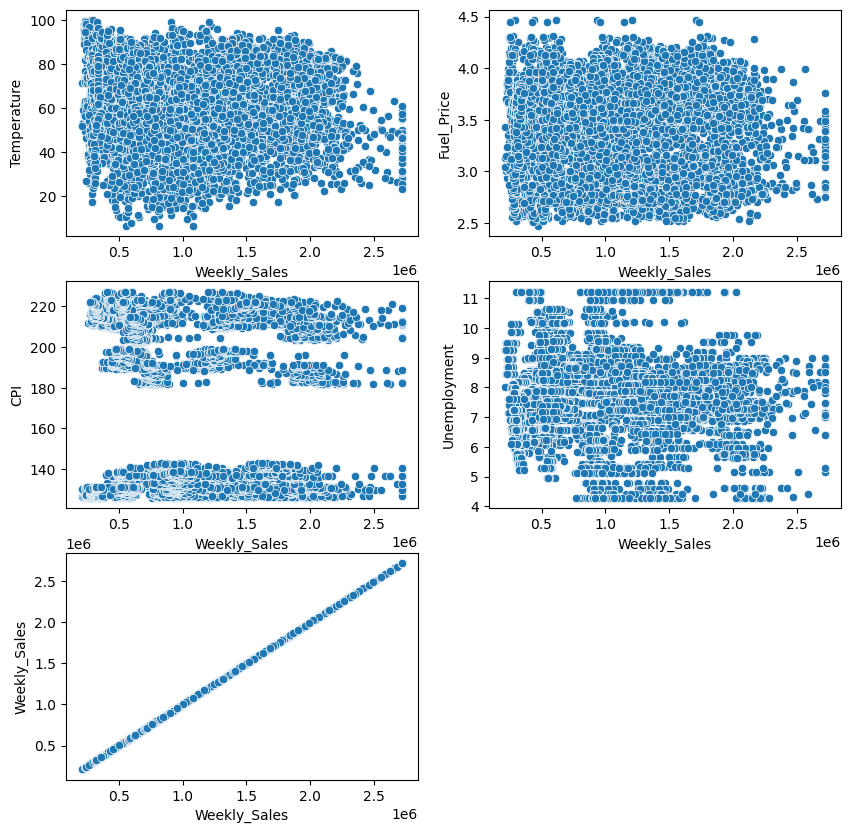

In [216]:
cols=['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']
plt.figure(figsize=(10,10))
pos=1
for i in cols:
  plt.subplot(3,2,pos)
  sns.scatterplot(x='Weekly_Sales',y=i,data=data)
  #plt.tight_layout()
  pos+=1
plt.show()

There is no significant correlation between Weekly Sales and other features

**13.Heat map**

In [217]:
data.corr()

<ipython-input-217-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,week
Store,1.000000e+00,-0.336559,-4.386841e-16,-0.022749,0.060023,-0.209492,0.255964,3.474318e-12,1.038488e-15
Weekly_Sales,-3.365589e-01,1.000000,3.670284e-02,-0.060808,0.010998,-0.072627,-0.108662,-1.634436e-02,6.108660e-02
Holiday_Flag,-4.386841e-16,0.036703,1.000000e+00,-0.155149,-0.078347,-0.002162,0.011204,-5.678257e-02,3.288032e-01
Temperature,-2.274937e-02,-0.060808,-1.551494e-01,1.000000,0.144962,0.176960,0.088315,6.428798e-02,7.313296e-02
Fuel_Price,6.002295e-02,0.010998,-7.834652e-02,0.144962,1.000000,-0.170642,-0.053428,7.794703e-01,-4.193804e-02
CPI,-2.094919e-01,-0.072627,-2.162091e-03,0.176960,-0.170642,1.000000,-0.278542,7.479573e-02,2.782979e-03
Unemployment,2.559643e-01,-0.108662,1.120376e-02,0.088315,-0.053428,-0.278542,1.000000,-2.526376e-01,-6.786673e-03
year,3.474318e-12,-0.016344,-5.678257e-02,0.064288,0.779470,0.074796,-0.252638,1.000000e+00,-1.269874e-01
week,1.038488e-15,0.061087,3.288032e-01,0.073133,-0.041938,0.002783,-0.006787,-1.269874e-01,1.000000e+00


<ipython-input-218-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

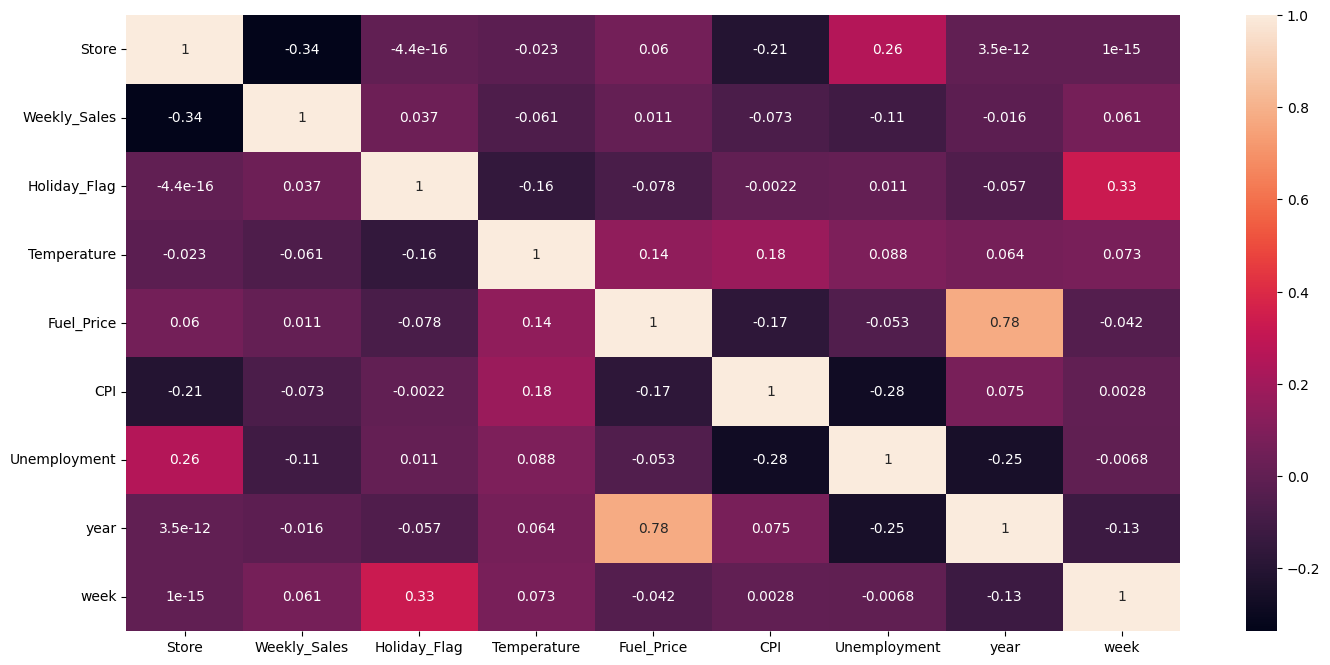

In [218]:
sns.heatmap(data.corr(),annot=True)

1. There's a correlation of 0.26 between store and unemployment.
2. Temperature and fuel price exhibit a correlation of just 0.14.
3. The correlation between temperature and CPI stands at 0.18, indicating a lesser degree of association.
4. Consequently, the risk of **multicollinearity** from these correlations appears diminished.
5. Year and fuel price are disregarded due to the year being a constant variable with only three unique values.

**14.Numeric features histogram**

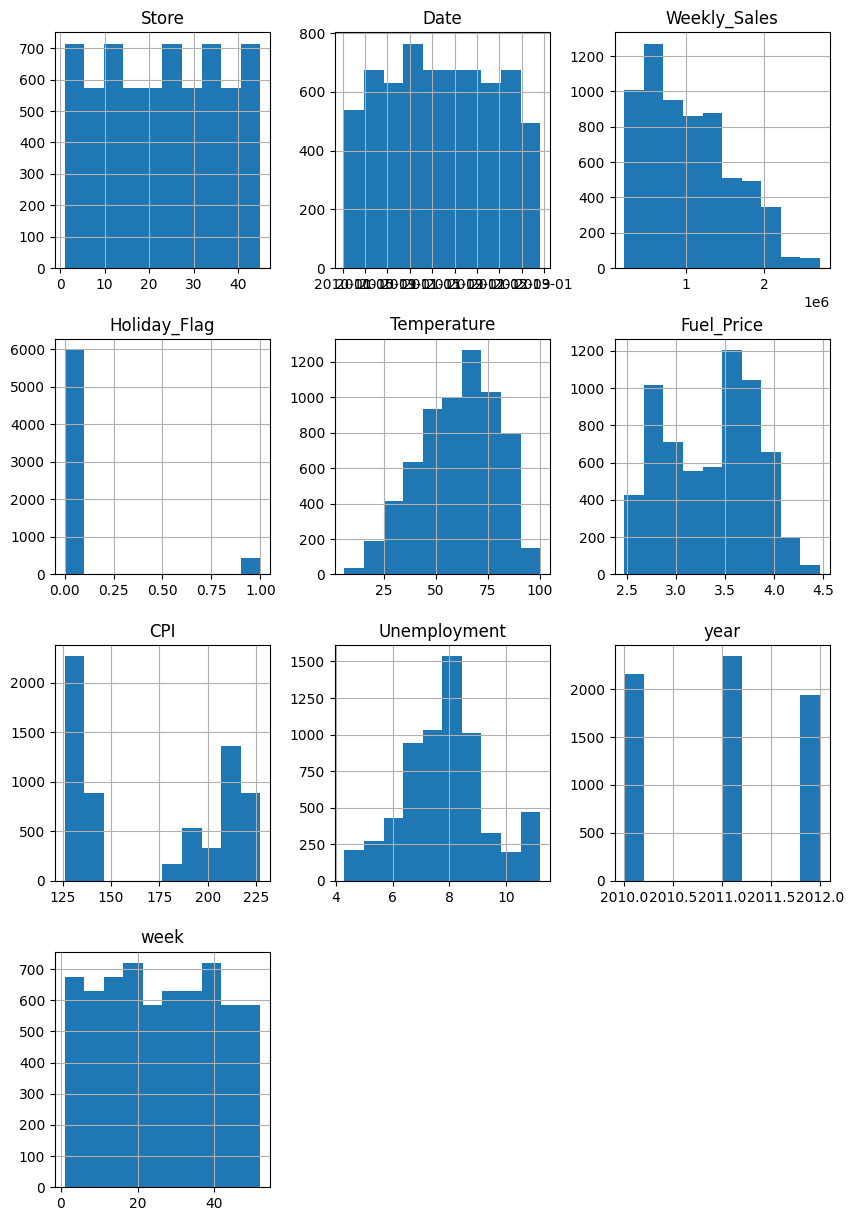

In [219]:
data.hist(figsize=(10,15))
plt.show()

**15.Features distribution**

<ipython-input-220-8a96354ef1e2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
<ipython-input-220-8a96354ef1e2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
<ipython-input-220-8a96354ef1e2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seab

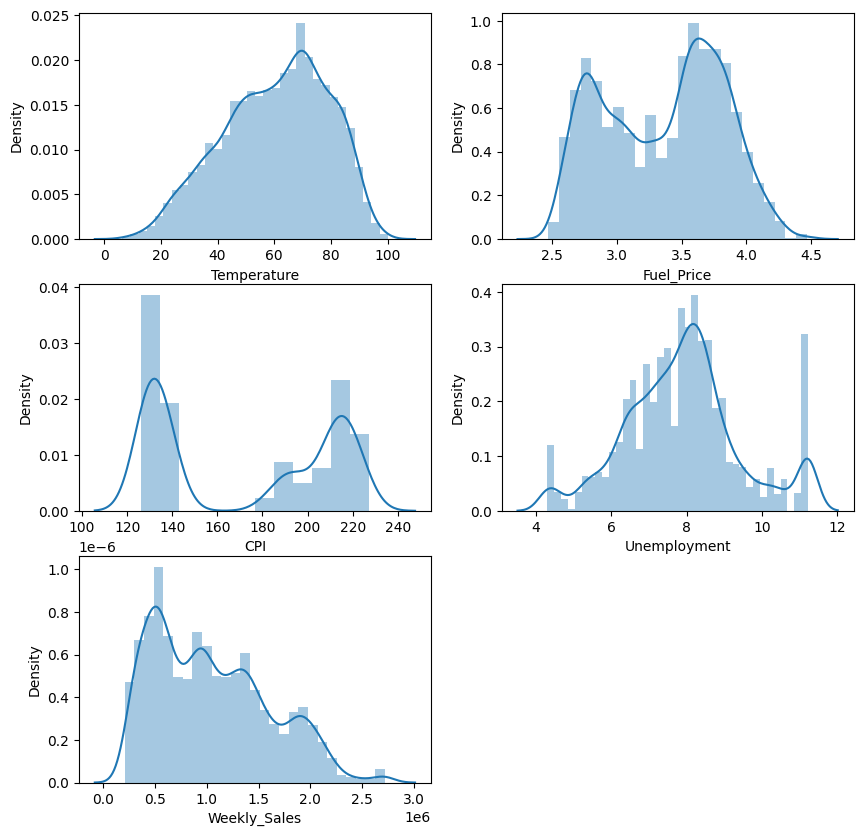

In [220]:
cols=['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']
plt.figure(figsize=(10,10))
pos=1
for i in cols:
  plt.subplot(3,2,pos)
  sns.distplot(data[i])
  #plt.tight_layout()
  pos+=1
plt.show()

In [221]:
data['Weekly_Sales'].mean()

1045029.2189176378

In [222]:
data['Weekly_Sales'].median()

960746.04

**Observations:**
The Weekly Sales distribution skews to the right, evident because the mean Weekly Sales (1045029.21) surpasses its median (960746.04).

Fuel price displays a bimodal distribution, indicating two distinct peaks.

Temperature distribution appears nearly normal.

Likewise, Unemployment follows a similar nearly normal distribution.

Consumer Price Index (CPI) reveals two distinct clusters.

Transactions among stores have remained relatively uniform across the years.

**Conclusion from Exploratory Data Analysis(EDA):**
As Thursday is the highest in terms of day-based sales, Thursday is the best day in the week for promotions

With December topping in sales of all stores, April is the best month for providing any discounts or coupons. Not just during April, during October and June store needs to stock items as there might be a rise in demand during these times.

2011 had the highest sales among all the three years

As most sales occur during the non-holiday weeks, stores must keep its stock reserved for these times than the holiday week

**Top 15 Walmart Stores that perform best on a weekly, monthly, daily, and yearly basis**
Store 20
Store 4
Store 13
Store 14
Store 2
Store 10
Store 27
Store 1
Store 6
Store 19
Store 39
Store 31
Store 23
Store 24
Store 11

Make sure that these top-performing stores maintain sufficient inventory levels, as they consistently demonstrate strong performance on an annual, weekly, monthly, and daily basis.

**Top 15 Walmart stores that performs least on a weekly, monthly, daily and yearly basis**
Store 33
Store 44
Store 5
Store 36
Store 38
Store 3
Store 30
Store 37
Store 16
Store 9
Store 29
Store 42
Store 7
Store 43
Store 15

These stores received limited public attention or foot traffic for transactions. Therefore, it's advisable to reduce inventory levels in these stores and concentrate on increasing transaction volume in this area. Subsequently, adjust the stock-keeping units (SKUs) accordingly to align with demand.

**Feature Engineering**

In [223]:
data_cp=data.copy()

In [224]:
data_cp.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010,18


In [225]:
data_cp.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'day', 'month', 'year', 'week'],
      dtype='object')

In [226]:
data_cp.drop(['Date','day','month','year','week'],axis=1,inplace=True)

In [227]:
data_cp.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


**one-hot encoding for store and. holiday_flag**

In [228]:
df_dummies=pd.get_dummies(data_cp,columns=['Store','Holiday_Flag'],drop_first=True)

In [229]:
df_dummies.columns

Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7',
       'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13',
       'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19',
       'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25',
       'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31',
       'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37',
       'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43',
       'Store_44', 'Store_45', 'Holiday_Flag_1'],
      dtype='object')

In [230]:
x=df_dummies.drop(['Weekly_Sales'],axis=1)
y=df_dummies['Weekly_Sales']

In [231]:
x

,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_1
0,42.31,2.572,211.096358,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.51,2.548,211.242170,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,39.93,2.514,211.289143,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46.63,2.561,211.319643,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46.50,2.625,211.350143,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,64.88,3.997,192.013558,8.684,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6431,64.89,3.985,192.170412,8.667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6432,54.47,4.000,192.327265,8.667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6433,56.47,3.969,192.330854,8.667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [232]:
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

In [233]:
#Splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3345)

In [234]:
#standardizing features
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train_scaled=st.fit_transform(x_train)
x_train_scaled

array([[ 0.62977562,  0.94272817, -0.88720777, ..., -0.15298291,
        -0.15222117, -0.26570025],
       [ 0.11037927, -1.32792889,  0.49996066, ..., -0.15298291,
        -0.15222117, -0.26570025],
       [-1.01978367,  0.44130053, -1.05073141, ..., -0.15298291,
        -0.15222117, -0.26570025],
       ...,
       [ 0.23764497,  0.94272817, -0.88720777, ..., -0.15298291,
        -0.15222117, -0.26570025],
       [-0.40956095, -1.00167247, -1.14327988, ..., -0.15298291,
        -0.15222117, -0.26570025],
       [ 1.26175316,  2.03097943, -1.01927198, ..., -0.15298291,
        -0.15222117, -0.26570025]])

In [235]:
x_test_scaled=st.fit_transform(x_test)
x_test_scaled

array([[ 1.76435273,  0.91914745, -1.06470618, ..., -0.14544012,
        -0.14728585, -0.29334577],
       [-0.04217491,  0.81782895, -1.07316973, ..., -0.14544012,
        -0.14728585,  3.40894632],
       [-0.40261839,  0.60225768, -1.08704066, ..., -0.14544012,
        -0.14728585,  3.40894632],
       ...,
       [-0.21135167,  1.537837  , -0.86407024, ..., -0.14544012,
        -0.14728585, -0.29334577],
       [ 1.28322264,  0.34788358, -1.10593132, ..., -0.14544012,
        -0.14728585, -0.29334577],
       [-1.87618031, -0.01427615, -1.01171494, ..., -0.14544012,
        -0.14728585,  3.40894632]])

In [236]:
print(x_train_scaled.shape,y_train.shape)
print(x_test_scaled.shape,y_test.shape)

(4504, 49) (4504,)
(1931, 49) (1931,)


**Model Building and Evaluation**

In [237]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train_scaled,y_train)

LinearRegression()

In [238]:
LR.intercept_

1049563.3441751776

In [239]:
LR.coef_

array([-1.07700137e+04, -1.64962068e+04,  8.13352793e+04, -3.35304451e+04,
        5.43886800e+04, -1.69625884e+05,  9.31498820e+04, -1.91142645e+05,
        1.80906129e+01, -1.34505473e+05, -1.02875523e+05, -1.52197271e+05,
        7.97788204e+04, -2.83389777e+04, -3.96716107e+04,  8.70655420e+04,
        8.02517227e+04, -1.10708060e+05, -1.45343345e+05, -7.52097288e+04,
       -4.20042444e+04,  1.04839575e+04,  8.25851122e+04, -1.13810578e+05,
       -5.49363557e+04, -6.69155649e+03, -3.44618907e+03, -1.25829300e+05,
       -5.67664426e+04,  5.98818329e+04,  6.44591870e+03, -1.18592994e+05,
       -1.63082122e+05, -2.32299641e+04, -5.01428664e+04, -1.58961490e+05,
       -5.37683213e+04, -6.79989839e+04, -1.67985589e+05, -1.58797946e+05,
       -1.33869142e+05, -1.17260894e+04, -7.13459636e+04, -4.06199481e+04,
       -1.20179343e+05, -1.19764368e+05, -1.64776325e+05, -1.02072429e+05,
        1.79813787e+04])

In [240]:
y_pred=LR.predict(x_test_scaled)

In [241]:
y_pred_train=LR.predict(x_train_scaled)

In [242]:
from sklearn.metrics import r2_score
from sklearn import metrics
r2_score(y_test,y_pred)

0.9187093904832456

In [243]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ",metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  108917.38993758778
MSE:  24786290040.097435
RMSE:  157436.62229639402


In [244]:
#r2_score for train
r2_train=r2_score(y_train,y_pred_train)
print(r2_train)

0.9319964778243033


In [245]:
print("MAE: ", metrics.mean_absolute_error(y_train, y_pred_train))
print("MSE: ",metrics.mean_squared_error(y_train, y_pred_train))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE:  87883.76085416897
MSE:  21276405602.352863
RMSE:  145864.33972137558


<ipython-input-246-d3cb8f842d1d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


<Axes: xlabel='Weekly_Sales', ylabel='Density'>

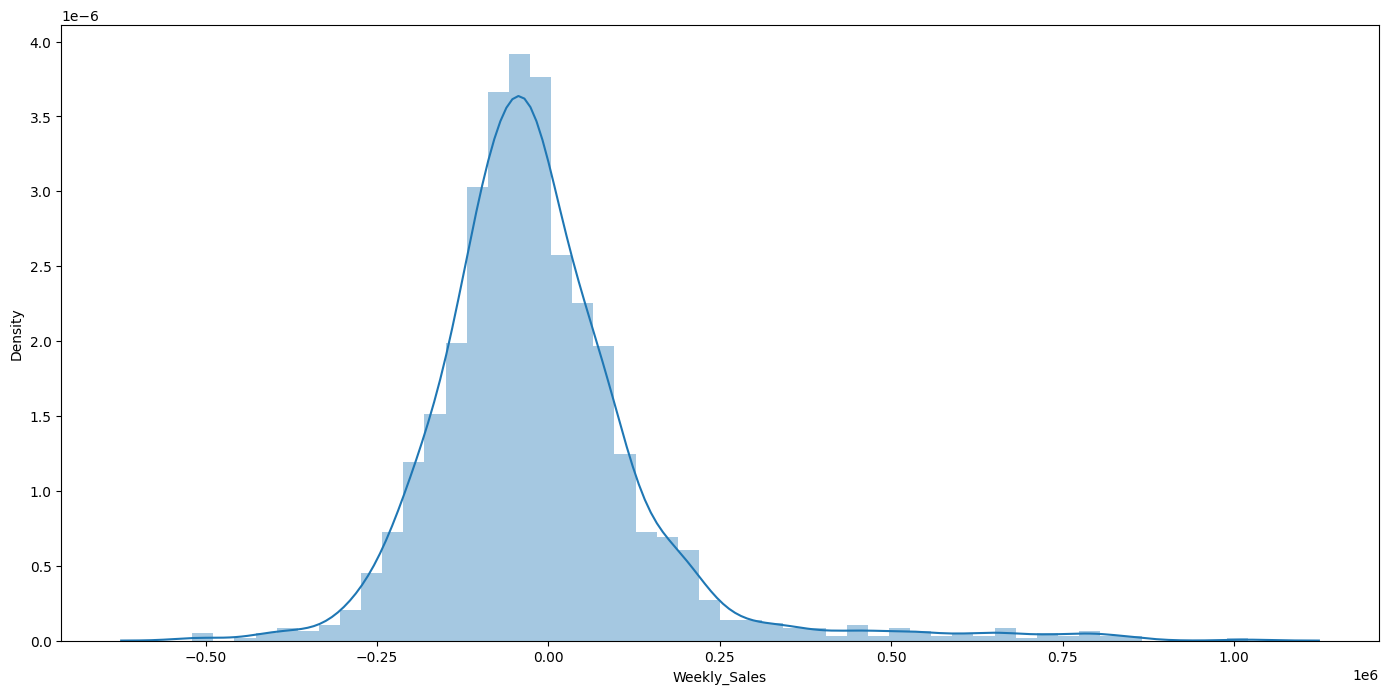

In [246]:
#Plotting the residuals to check its normality
sns.distplot(y_test - y_pred)

Feature: 0, Score: -10770.01374
Feature: 1, Score: -16496.20678
Feature: 2, Score: 81335.27928
Feature: 3, Score: -33530.44508
Feature: 4, Score: 54388.67998
Feature: 5, Score: -169625.88444
Feature: 6, Score: 93149.88197
Feature: 7, Score: -191142.64545
Feature: 8, Score: 18.09061
Feature: 9, Score: -134505.47273
Feature: 10, Score: -102875.52274
Feature: 11, Score: -152197.27128
Feature: 12, Score: 79778.82036
Feature: 13, Score: -28338.97770
Feature: 14, Score: -39671.61067
Feature: 15, Score: 87065.54203
Feature: 16, Score: 80251.72271
Feature: 17, Score: -110708.06018
Feature: 18, Score: -145343.34527
Feature: 19, Score: -75209.72885
Feature: 20, Score: -42004.24439
Feature: 21, Score: 10483.95746
Feature: 22, Score: 82585.11217
Feature: 23, Score: -113810.57823
Feature: 24, Score: -54936.35566
Feature: 25, Score: -6691.55649
Feature: 26, Score: -3446.18907
Feature: 27, Score: -125829.29955
Feature: 28, Score: -56766.44257
Feature: 29, Score: 59881.83293
Feature: 30, Score: 6445.9

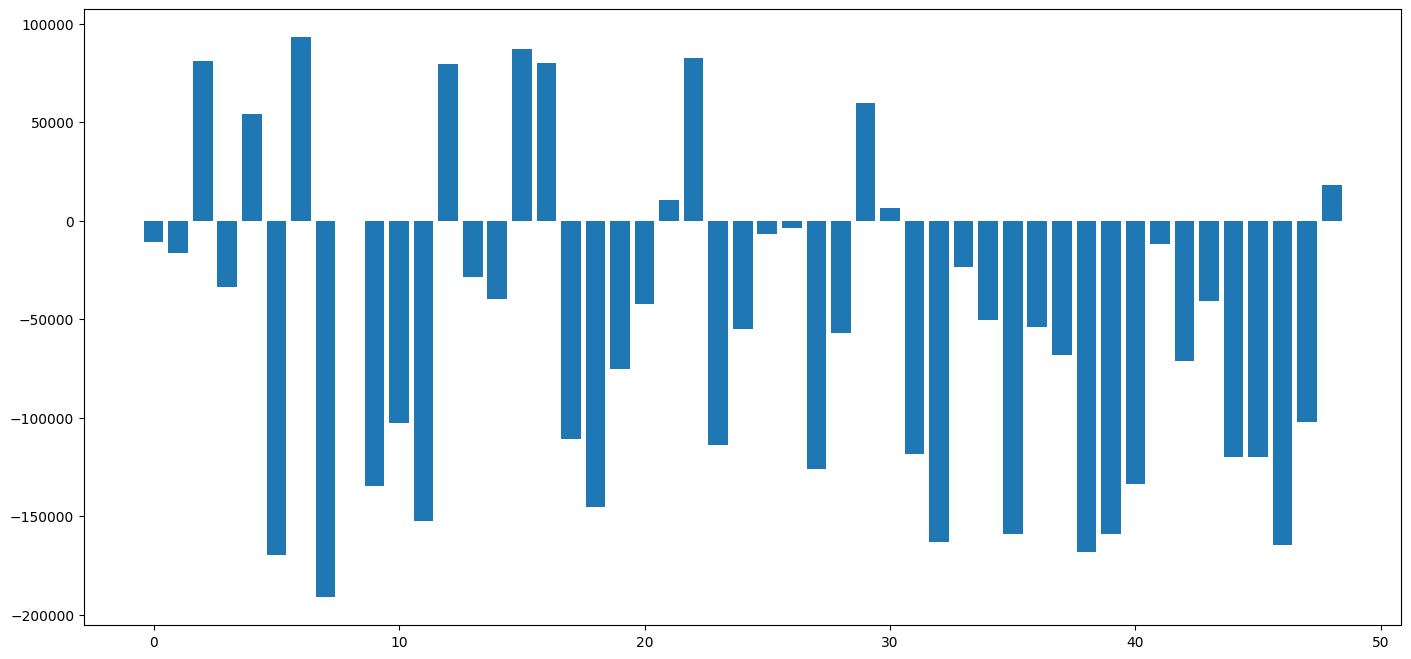

In [247]:
#Feature importance
importance=LR.coef_
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f'%(i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()

Barplot to find high impacting features

<ipython-input-248-adc785aabf0f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=x.columns,x=LR.coef_,palette='Set1')


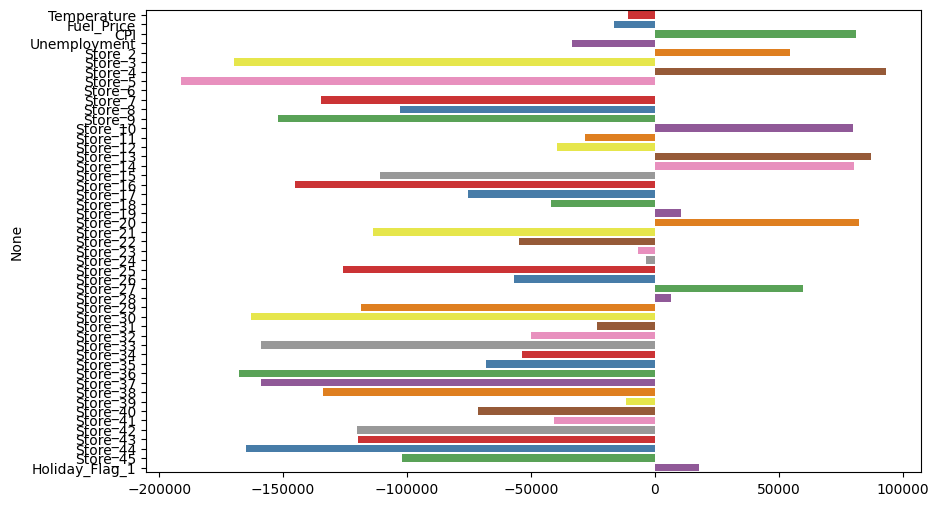

In [248]:
plt.figure(figsize=(10, 6))
sns.barplot(y=x.columns,x=LR.coef_,palette='Set1')
plt.show()

**---Prophet----**

In [249]:
cp_data=data[['Date','Weekly_Sales']]

In [250]:
cp_data['Date']=pd.to_datetime(cp_data['Date'])

<ipython-input-250-731cf89bc69a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp_data['Date']=pd.to_datetime(cp_data['Date'])


In [251]:
cp_data.sort_values(by='Date')

,Date,Weekly_Sales
606,2010-01-10,283178.12
2036,2010-01-10,566945.95
5897,2010-01-10,481523.93
4610,2010-01-10,224294.39
5039,2010-01-10,422169.47
...,...,...
5860,2012-12-10,1409544.97
2285,2012-12-10,491817.19
1427,2012-12-10,1713889.11
3572,2012-12-10,697317.41


In [252]:
cp_data.dtypes

Date            datetime64[ns]
Weekly_Sales           float64
dtype: object

In [253]:
cp_data.head()

,Date,Weekly_Sales
0,2010-05-02,1643690.90
1,2010-12-02,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-05-03,1554806.68


**Augmented Dickey-Fuller Test for Stationarity**
Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.

Null Hypothesis (H0): The time series is not stationary.

Alternate Hypothesis (H1): The time series is stationary.

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [254]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(cp_data['Weekly_Sales'], autolag='AIC')  # Corrected 'autolag' parameter name
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')


ADF Statistic: -4.646488110405524
n_lags: 34
p-value: 0.00010594724729510744


From the values it can be concluded that the data is stationary.

In [255]:
cp_data.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}, inplace=True)

<ipython-input-255-83db2c2cb6c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp_data.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}, inplace=True)


In [256]:
cp_data.head()

,ds,y
0,2010-05-02,1643690.90
1,2010-12-02,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-05-03,1554806.68


In [257]:
from prophet import Prophet
model=Prophet()

In [258]:
model.fit(cp_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1xkx8p_p/0l5tzueg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1xkx8p_p/j_83uhk5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13505', 'data', 'file=/tmp/tmp1xkx8p_p/0l5tzueg.json', 'init=/tmp/tmp1xkx8p_p/j_83uhk5.json', 'output', 'file=/tmp/tmp1xkx8p_p/prophet_modelmdqtuvtq/prophet_model-20240220235754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:57:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:57:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [259]:
future=model.make_future_dataframe(periods=365)

In [260]:
forecast = model.predict(future)

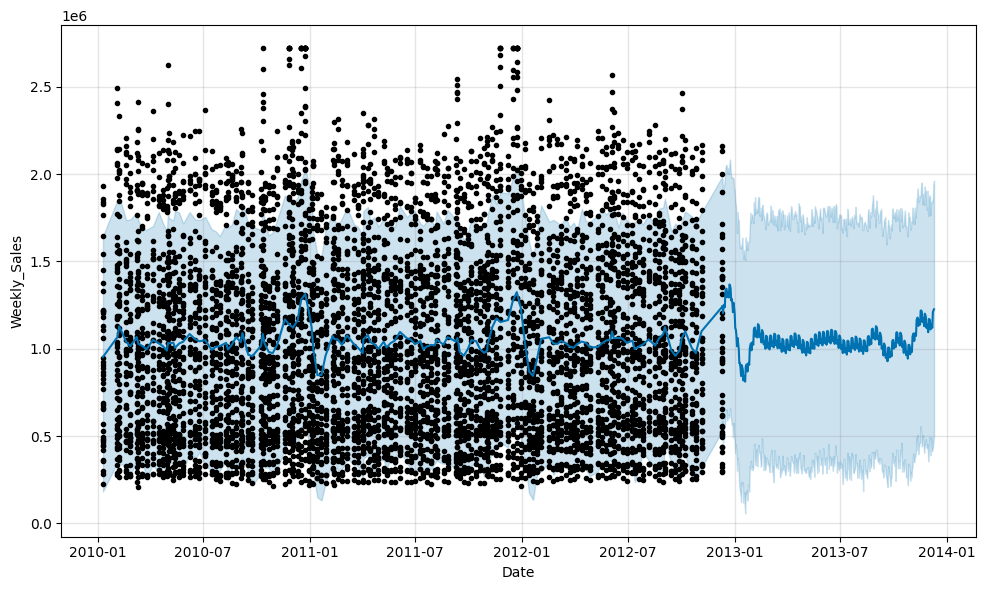

In [261]:
# Plot the forecast without observed data points
fig = model.plot(forecast, xlabel='Date', ylabel='Weekly_Sales')
plt.show()


In [262]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_true = cp_data['y'].sample(n=143, random_state=42)  # Sample a random subset of 143 records
  # Actual observed values (excluding the future predictions)
y_pred = forecast['yhat'][:-365]  # Forecasted values (excluding the future predictions)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 463751.13805539184
Mean Squared Error (MSE): 322840930171.79297
Root Mean Squared Error (RMSE): 568190.9275690637


In [263]:
cp_data.describe()

,y
count,6.435000e+03
mean,1.045029e+06
std,5.572961e+05
min,2.099862e+05
25%,5.533501e+05
50%,9.607460e+05
75%,1.420159e+06
max,2.720371e+06


**Observations:**
The forecast indicates that Weekly_Sales are projected to remain relatively stable throughout the year 2013, with a gradual increase anticipated towards the conclusion of 2023.


**Thursday as the Best Day for Promotions:** Given that Thursday records the highest day-based sales, it suggests that it could be the most favorable day for running promotions or marketing campaigns to capitalize on peak sales periods.

**April as the Best Month for Discounts:** With December leading in sales across all stores, April emerges as a prime month for offering discounts or coupons. Additionally, heightened demand during October and June highlights the importance of stocking up during these periods.

**Highest Sales in 2011:** The observation that 2011 had the highest sales among the three years indicates the significance of that particular year in terms of revenue generation. It suggests that strategies employed in 2011 may have been particularly successful and could serve as a reference for future planning.

**Focus on Non-Holiday Weeks:** Since most sales occur during non-holiday weeks, it underscores the importance of prioritizing inventory for these periods over holiday weeks. This ensures that stores can meet demand during peak sales periods and optimize revenue potential.

**Top-Performing Stores Maintenance:** The list of top-performing Walmart stores, both on a weekly, monthly, daily, and yearly basis, emphasizes the need to maintain sufficient inventory levels. Consistent strong performance indicates a reliable demand, necessitating adequate stock to meet customer needs.

**Least Performing Stores Optimization:** Conversely, stores at the lower end of the performance spectrum require attention to optimize their operations. This may involve reducing inventory levels, focusing on increasing foot traffic and transactions, and aligning stock-keeping units (SKUs) with demand to enhance efficiency and profitability.